# 확률적 경사 하강법(StochasticGradientDescent)

- 훈련 세트에서 랜덤(확률적)하게 하나의 샘픙르 선택하여 가파른 경사를 조금씩 내려감
- 그 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감
- 이런 식으로 전체 샘플을 모두 사용할 때까지 계속함
- 전체 샘플을 모두 사용했지만 최적점을 찾지 못하면 다시 훈련 세트에 모든 샘플을 채워 넣어 위의 과정을 반복
- 만족할만한 위치(최적점)에 도달할 때까지 계속해서 반복하는 방법이 "확률적 경사 하강법"
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정 = "에포크(epoch)"
- 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행

- 무작위로 샘플을 선택해 최적점을 찾아 하강하는 것은 오류를 범할 수 있기 때문에 아주 조금씩 하강하는 것이 중요
- 여러 개의 샘픙르 사용해 경사 하강법을 수행하는 방식 ="미니배치 경사 하강법(minibatch gradient descent)"
- 한 번 경사로를 따라 이동하기 위해 훈련 세트의 전체 샘플을 사용하는 방식 ="배치 경사 하강법(batch gradietn descent)"


### 정리

- 훈련 세트에서 샘플을
- 1개씩 꺼내기 = 확률적 경사 하강법
- 여러 개씩 꺼내기 = 미니배치 경사 하강법
- 전체 다 꺼내기 = 배치 경사 하강법
- 어떤 방법이 됐든 훈련 세트의 모든 샘플을 사용하도록 반복을 하게 되는데 전체 샘플을 한 번 다 사용하면 "1 에포크 완료"
- 훈련 세트를 다 사용했지만 최적점을 찾지 못하면 훈련 세트에 샘플을 모두 채우고 다시 시작

## 손실 함수 (Loss Function)

- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 따라서 손실 함수의 값이 작을 수록 좋은 머신러닝 알고리즘
- 어떤 값이 최솟값인지 알지 못하기 때문에 이 값을 찾아서 조금씩 이동하기 위해 확률적 경사 하강법을 활용함
- 손실함수는 연속적이어야 한다 = 미분 가능해야 한다

# 확률적 경사 하강법을 사용한 분류 모델

In [1]:
# 데이터 준비

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [2]:
# 훈련 세트와 테스트 세트

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [3]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# SGDClassifier
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스

from sklearn.linear_model import SGDClassifier

# 객체를 만들 때 2개의 매개변수를 지정
# loss = 손실함수의 종류(log = 로지스틱 손실 함수)
# max_iter = 수행할 에포크 횟수

sc = SGDClassifier(loss='log', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\82105\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


- 위의 훈련 세트와 테스트 세트 정확도가 낮음
- 10 에포크로는 부족
- 확률적 경사 하강법은 점진적 학습이 가능 = 훈련을 다시 하기 위해서 SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc로 추가 훈련 가능
- 모델을 이어서 훈련할 때는 fit()메서드 대신 partial_fit() 메서드 사용
- fit() 메서드와 사용법은 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있음

In [7]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


- 에포크를 한 번 더 실행하니 정확도 향상
- 하지만 아직 점수가 낮아 더 수행해야할 듯 함
- 무작정 많이 반복할 수가 없으니 반복할 기준이 필요

- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 overfitting, underfitting 될 수 있음
- 에포크 횟수가 적다 = 모델이 훈련 세트를 덜 학습한다 = underfitting 될 가능성이 커진다
- 에포크 횟수가 많다 = 모델이 훈련 세트에 너무 잘 맞는다 = overfitting 될 가능성이 커진다
- 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가
- 테스트 세트 점수는 어느 순간 감소하기 시작 = overfitting이 시작되는 곳
- 이 지점 전에 훈련을 멈추는 것을 "조기 종료(early stopping)"

In [9]:
# partial_fit() 메서드만 사용하여 에포크 횟수에 따른 overfitting, underfitting 지점 확인해보기

import numpy as np

sc = SGDClassifier(loss='log', random_state = 42)

# 훈련 세트, 테스트 세트 점수를 에포크 횟수에 따라 그래프로 그리기 위해 각 점수의 리스트 생성
train_score = []
test_score = []

# fit()을 사용하지 않고 partial_fit()만 사용하기 위해서는 훈련 세트에 있는 전체 클래스의 레이블을 전달해줘야함
# 이를 위해 np.unique() 메서드를 train_target에 적용

classes = np.unique(train_target)

# 에포크 300회 돌려보기
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

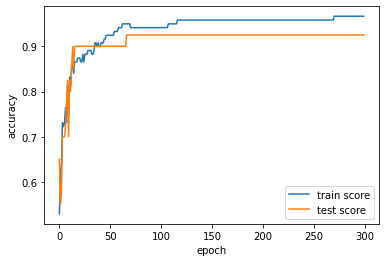

In [13]:
# train_score, test_score 그래프로 나타내기

import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train score')
plt.plot(test_score, label = 'test score')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

- 에포크 초기에는 두 세트 점수 모두 낮은 underfitting의 모습을 보여주고 있음
- 100 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음 -> overfitting이 심해지고 있음
- 100 번째 에포크가 적절한 반복 횟수로 보이니 max_iter = 100으로 두고 다시 모델을 훈련해보자

In [14]:
sc = SGDClassifier(loss='log', max_iter = 100, tol=None, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- 원래 SGDClassifier 클래스는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
- 즉 max_iter가 아무리 높아도 반복 중 성능 향상이 멈추면 반복을 자동으로 멈추게 된다
- 매개변수 tol = None으로 주면 자동으로 멈추지 않고 지정한 max_iter 값만큼 무조건 반복하게 됨